# Penrose Tilings: A First Lesson in Objects <a name="top"> </a>

I was thinking about object-oriented programming in Python and I wanted to set myself a programming exercise.  I have had a long-standing interest in Penrose tiles and thought that these would make an interesting case study. If you need a reference for Penrose tiles, the <a href="https://en.wikipedia.org/wiki/Penrose_tiling">Wikipedia entry</a> is pretty good, and I also found an interesting website attributed to a <a href="http://www.mrbertman.com/penroseTilings.html">Mr. Bertman</a> which is interactive. 

"Everything is an object in Python."  OK.  That's a true statement, but it may not be helpful to someone who doesn't already know what an object is. So, what's an object?  An object is a container that has data inside of it but also comes with a defined set of actions that you can apply to it. These actions, called methods, retrieve that data in the object, set the values of the data in the object, and manipulate the data inside the object.  If you're using pandas, a dataframe is an object that has data in it, rows and columns, and you can apply functions to a dataframe. For example, if the data frame is called <tt>df</tt>, you can get the averages of each column with <tt>df.mean()</tt>.  The dot between the object name and the method name is called "dot notation", and it has been used by object-oriented languages <a href="https://cs.stackexchange.com/questions/89031/what-is-the-origin-of-dot-notation">since their inception in the mid-1960s</a>. Similar to objects, you can get the values of the internal data of an object through the object's <i>attributes</i> which are also visible through dot notation; e.g. <tt>df.shape</tt> tells you the number of rows and columns in the dataframe <tt>df</tt>.

In this notebook, we're going to create objects that represent Penrose tiles. That means we will need to define each of the four vertices of a tile as ordered pairs in the plane. We will use 2x1 arrays from numpy.  The first methods that we will define on a tile apply rigid motions to that tile: <a href="https://en.wikipedia.org/wiki/Translation_(geometry)">translations</a> and <a href="https://en.wikipedia.org/wiki/Rotation_matrix">rotations</a>. We also want to be able to draw the tiles. So we will need to import numpy and matplotlib. I will also import matrix_power from numpy.linalg, and I will explain why shortly. 

In [1]:
import numpy as np
from numpy.linalg import matrix_power
import matplotlib.pyplot as plt

Here is an image of a Kite without any shading or decoration:
<img src="Basic_Kite.png" />
It has four vertices. Think of the obtuse angle as the "head", and the vertex opposite the head as the "tail". The remaining vertices are simply "right" and "left".

Basic entities in Python each have a type; for example, 42 is an integer (<tt>int</tt>), 'abc' is a string (<tt>str</tt>), and 3.14159 is a floating point number (<tt>float</tt>). Similarly, we say that each object is part of a <i>class</i>, or that an object is an <i>instantiation</i> of a class. The Empire State Building is an instantiation of the class of buildings, and my house is another (quite different) building.

An object is instantiated through a call to a special method called a <i>constructor</i>. In pandas, a dataframe in instantiated through the function <tt>pd.DataFrame()</tt> where the data is provided from the Python program. The pandas function <tt>pd.read_csv()</tt> is basically another constructor for the DataFrame class. In Python, you declare a class using the <tt>class</tt> keyword, and you define the default constructor as <tt>__init__</tt>.

To instantiate a kite, at the minimum I need to know where its tail is located, what its orientation is, and how large to draw it. Let me start by defining some useful constants (scalars, vectors, and matrices) and then we'll declare the class Kite which I'll explain below.

In [2]:
#The golden ratio is an ever present number in Penrose tilings
phi = (1.0 + np.sqrt(5.0))/2.0

# Here are some basic vectors in the plane: the zero vector, and the 
# standard basis vectors.
vec0 = np.zeros((2,1))
e1 = np.array([[1],[0]])
e2 = np.array([[0],[1]])

# The matrix m below rotates points in the plane by theta radians.
# Conside the point (1,0) represented by the array [[1],[0]].  
# m @ e1 gives the vector [[np.cos(theta)],[np.sin(theta)]]
theta = np.pi/10.0
m = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta),np.cos(theta)]])

# Note that we do not need arbitrary rotations to draw Penrose tiles, 
# just a finite set. We use a fixed value of theta of pi/10 (or 36 degrees). 
# To rotate a vector v by pi/5 or 2*pi/10 we apply the matrix m twice:  
# m @ m @ v or matrix_power(m,2) @ v.

To get started, I am going to declare a class that will instantiate a kite of a fixed size, orientation, and location using the constant vectors and matrices given in the previous cell.  I also provide a method called <tt>draw()</tt> that plots the kite.  Once we have this dumb-downed kite under our belt, we will modify the class so that our constructor creates kites of arbitray size, location, and orientation.

In [3]:
# Use the keyword "class" to declare the class Kite.
class Kite():

    # We define a function for the default constructor. 
    # You instantiate a kite with the function call Kite().
    # Note that there is NO RETURN VALUE for __init__.
    def __init__(self):
        self.tail = vec0
        self.right = e1
        self.head = matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1

    def draw(self):
        plt.plot([self.tail[0],self.right[0],self.head[0],
                  self.left[0],self.tail[0]],
                 [self.tail[1],self.right[1],self.head[1],
                  self.left[1],self.tail[1]],
                 '-k')
# The draw() method produces the plot as a side effect and also 
# has no return value.

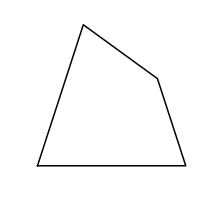

In [4]:
# Instantiate a kite, k, and draw it.
k = Kite();

plt.figure(figsize=(3,3));
k.draw();

plt.axis('square'); 
# plt.axis('square') ensures that the aspect ratio represent angles 
# correctly, but it may add additional space in one direction. Alternately, 
# modify the figsize option passed to plt.figure.  plt.axis() gives the 
# bounds of the plot.

plt.axis('off'); 
# plt.axis('off') prevents the bounding box from appearing around the plot.

Now we modify the constructor to include an arbitrary orientation, scaling, and position. So it is useful to define methods that rotate, rescale, and translate the default object.  At the same time we introduce three more attributes to the class definition being careful to make sure that the new methods take into account their effects on the new attributes.

In [5]:
class Kite():

    def __init__(self,tail=vec0,orient=0,scale=1):
    
        self.tail = vec0
        self.right = e1
        self.head = matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1
        # we may find it useful to track the orientation, scale, and center 
        # of the kite
        self.orient = 0
        self.scale = 1
        self.centroid = (self.tail + self.right + self.head + self.left)/4
        # apply rotation, rescaling, and traslation 
        self.rotate(orient).rescale(scale).translate(tail)
        
    def rotate(self,n):
        self.tail = matrix_power(m,n) @ self.tail
        self.right = matrix_power(m,n) @ self.right
        self.head = matrix_power(m,n) @ self.head
        self.left = matrix_power(m,n) @ self.left
        # theta = pi/10; so 20*theta = 2*pi is a full rotation.
        self.orient = self.orient + n % 20
        # The centroid is rotated about the origin just as the vertices are.
        self.centroid = matrix_power(m,n) @ self.centroid
        # self.scale is unaffected by rotation.
        return self

    def rescale(self,s):
        self.tail *= s
        self.right *= s
        self.head *= s
        self.left *= s
        self.centroid *= s
        self.scale *= s
        # self.orient is unaffected by rescaling.
        return self

    def translate(self,v):
        self.tail += v
        self.right += v
        self.head += v
        self.left += v
        self.centroid += v
        # self.orient and self.scale are unaffected by translation.
        return self

    def draw(self):
        plt.plot([self.tail[0],self.right[0],self.head[0],
                  self.left[0],self.tail[0]],
                 [self.tail[1],self.right[1],self.head[1],
                  self.left[1],self.tail[1]],
                 '-k')


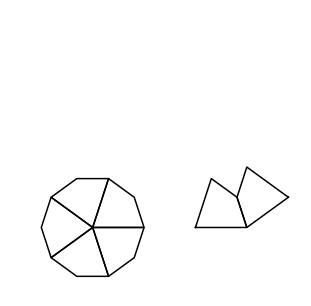

In [6]:
# We create an empty list and start putting kites into it.
kites = []
kites.append(Kite())
kites.append(Kite(orient=4))
kites.append(Kite(orient=8))
kites.append(Kite(orient=12))
kites.append(Kite(orient=16))

# We create another empty list and put kites into it too.
kites2 = []
# Our default kite is moved to the right 2 units
kites2.append(Kite().translate(2*e1))
# The second kite is rotated and positioned to be adjacent to the first. 
kites2.append(Kite(tail=(e1 + matrix_power(m,2)@e1),orient=8).translate(2*e1))

# Draw the kites in both lists.
plt.figure(figsize=(11,5));
[k.draw() for k in kites];
[k.draw() for k in kites2];
plt.axis('off');
plt.axis('square');
# Note the plt.axis('square') adds space in the y direction in a suboptimal way.
# You may need to experiment with the effects of figsize and plt.axis('square') 
# or by manually setting the axis.

What about the class Dart? Aside from the constructor, the Dart class would be defined almost identically.  In fact  we would like to reuse the code for rotation, rescaling, and translation for the Dart class too.  Fortunately, we can define a <i>super-class</i> called <i>Tile</i> and use a property of classes called <i>inheritance</i> to propagate the common properties of a Tile to both Kites and Darts.  This requires that we "refactor" our objects by moving the common methods from Kite to Tile.

Here is an image of a Dart without any shading or decoration:
<img src="Basic_Dart.png" />
Think of the largest interior angle as the "tail", and the vertex opposite the tail as the "head". The remaining vertices are simply "right" and "left".

In [7]:
class Tile():
    # There is no __init__ for Tile, because we never need to instantiate 
    # an object of this class. The subclasses Kite and Dart have constructors 
    # unique to each.
    
    def rotate(self,n):
        self.tail = matrix_power(m,n) @ self.tail
        self.right = matrix_power(m,n) @ self.right
        self.head = matrix_power(m,n) @ self.head
        self.left = matrix_power(m,n) @ self.left
        # theta = pi/10; so 20*theta = 2*pi is a full rotation.
        self.orient = self.orient + n % 20
        # The centroid is rotated about the origin just as the vertices are.
        self.centroid = matrix_power(m,n) @ self.centroid
        # self.scale is unaffected by rotation.
        return self

    def rescale(self,s):
        self.tail *= s
        self.right *= s
        self.head *= s
        self.left *= s
        self.centroid *= s
        self.scale *= s
        # self.orient is unaffected by rescaling.
        return self

    def translate(self,v):
        self.tail += v
        self.right += v
        self.head += v
        self.left += v
        self.centroid += v
        # self.orient and self.scale are unaffected by translation.
        return self
    
    def draw(self):
        plt.plot([self.tail[0],self.right[0],self.head[0],
                  self.left[0],self.tail[0]],
                 [self.tail[1],self.right[1],self.head[1],
                  self.left[1],self.tail[1]],
                 '-k')
        
# Note that we place the name of the super-class in parentheses. 
class Kite(Tile):

    def __init__(self,tail=vec0,orient=0,scale=1):
    
        self.tail = vec0
        self.right = e1
        self.head = matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1
        # we may find it useful to track the orientation, scale, and 
        # center of the kite
        self.orient = 0
        self.scale = 1
        self.centroid = (self.tail + self.right + self.head + self.left)/4
        # apply rotation, rescaling, and traslation 
        self.rotate(orient).rescale(scale).translate(tail)

class Dart(Tile):

    def __init__(self,head=vec0,orient=0,scale=1):
        # Note that we define the location of the dart by its head, not its tail.
    
        self.head = vec0
        self.right = e1
        self.tail = (1/phi)*matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1
        # we may find it useful to track the orientation, scale, and center 
        # of the dart
        self.orient = 0
        self.scale = 1
        self.centroid = (self.tail + self.right + self.head + self.left)/4
        # apply rotation, rescaling, and traslation 
        self.rotate(orient).rescale(scale).translate(head)


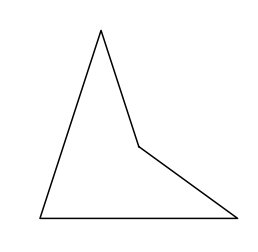

In [8]:
d = Dart()
d.draw()
plt.axis('square');
plt.axis('off');

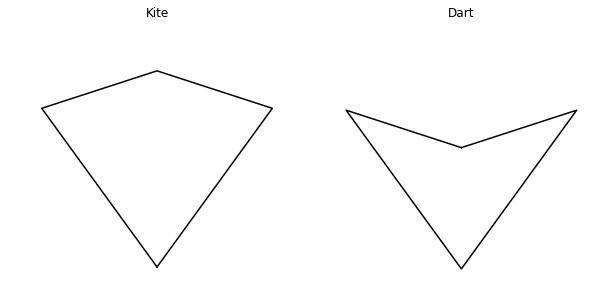

In [9]:
# This is essentially the code that I used to introduce Kites and Darts 
# in Part 1. 

simple_kite = Kite(orient=3)
simple_dart = Dart(orient=3)

plt.subplots(1,2,figsize=(10,5));
ax1 = plt.subplot(121)
simple_kite.draw()
plt.axis('square');
ax1.axis('off');
plt.title('Kite');

ax2 = plt.subplot(122)
simple_dart.draw()
plt.axis('square');
# fig.patch.set_visible(False);
ax2.axis('off');
plt.title('Dart');

### Decorating the tiles

We're almost done!

Let's add decoration to the kites and darts using the matplotlib <tt>fill</tt> command and by adding blue and orange arcs that help to enforce the tiling rules.  We can add decoration to the Kite and Dart by defining <tt>draw()</tt> methods that are specific to each class.  We can leave the default method of the Tile class alone, since the draw method for the sublcasses override the behavior of the superclass. 

This code is a bit longer than the original draw method.  Note that the draw methods have arguments <tt>arcs</tt> and <tt>fill</tt> to turn on these two features of the tiles  We don't need to repeat the class definition of the Tile class.

You can make changes to the fill color (shade) or to the color or linestyle of the arcs. As my father-in-law used to say, "Live it up!"

In [10]:
class Kite(Tile):

    def __init__(self,tail=vec0,orient=0,scale=1):
    
        self.tail = vec0
        self.right = e1
        self.head = matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1
        # we may find it useful to track the orientation, scale, and 
        # center of the kite
        self.orient = 0
        self.scale = 1
        self.centroid = (self.tail + self.right + self.head + self.left)/4
        # apply rotation, rescaling, and traslation 
        self.rotate(orient).rescale(scale).translate(tail)

    def draw(self,arcs=False,fill=False):
        if fill:
            plt.fill([self.tail[0],self.right[0],self.head[0],
                      self.left[0],self.tail[0]],
                     [self.tail[1],self.right[1],self.head[1],
                      self.left[1],self.tail[1]],
                     facecolor='0.7', edgecolor='black')
        else:
            plt.plot([self.tail[0],self.right[0],self.head[0],
                      self.left[0],self.tail[0]],
                     [self.tail[1],self.right[1],self.head[1],
                      self.left[1],self.tail[1]],
                     '-k')
        if arcs:
            # We use the array t to parametrize the arcs
            t = np.linspace(0,np.pi/2,30)

            # Here x and y are vectors. x points from the tail to the right 
            # vertex, and y from the tail to the left vertex. Both have 
            # local scope.
            x = self.right - self.tail
            y = self.left - self.tail
            
            # We use x and y to generate a parametric curve which is a circular 
            # arc centered at the tail, with radius (1/phi) times the length 
            # of the long edge of the kite, starting on the long right edge and 
            # ending on the long left edge.
            norm_xy = np.sqrt((x[0]*np.cos(t) + y[0]*np.sin(t))**2
                              + (x[1]*np.cos(t) + y[1]*np.sin(t))**2)
            z1 = self.tail[0] + (self.scale/phi)*(x[0]*np.cos(t) 
                                                  + y[0]*np.sin(t))/norm_xy
            z2 = self.tail[1] + (self.scale/phi)*(x[1]*np.cos(t) 
                                                  + y[1]*np.sin(t))/norm_xy
            plt.plot(z1,z2,color='tab:orange',linestyle='-',alpha=0.3)

            # Here x and y are new vectors. x points from the head to the left 
            # vertex, and y from the head to the right vertex. 
            x = self.left - self.head
            y = self.right - self.head
            
            # We use these values of x and y to generate a parametric curve 
            # which is a circular arc centered at the head, with radius 
            # (1/phi) times the length of the SHORT edge of the kite, 
            # starting on the short left edge and ending on the short right 
            # edge.
            norm_xy = np.sqrt((x[0]*np.cos(t) + y[0]*np.sin(t))**2
                           + (x[1]*np.cos(t) + y[1]*np.sin(t))**2)
            z1 = self.head[0] + (self.scale/phi**2)*(x[0]*np.cos(t) 
                                                     + y[0]*np.sin(t))/norm_xy
            z2 = self.head[1] + (self.scale/phi**2)*(x[1]*np.cos(t) 
                                                     + y[1]*np.sin(t))/norm_xy
            plt.plot(z1,z2,color='tab:blue',linestyle='-', alpha=0.3)


class Dart(Tile):

    def __init__(self,head=vec0,orient=0,scale=1):
        # Note that we define the location of the dart by its head, not its tail.
    
        self.head = vec0
        self.right = e1
        self.tail = (1/phi)*matrix_power(m,2) @ e1
        self.left = matrix_power(m,4) @ e1
        # we may find it useful to track the orientation, scale, and center of 
        # the dart
        self.orient = 0
        self.scale = 1
        self.centroid = (self.tail + self.right + self.head + self.left)/4
        # apply rotation, rescaling, and traslation 
        self.rotate(orient).rescale(scale).translate(head)

    def draw(self,arcs=False,fill=False):
        if fill:
            plt.fill([self.tail[0],self.right[0],self.head[0],
                      self.left[0],self.tail[0]],
                     [self.tail[1],self.right[1],self.head[1],
                      self.left[1],self.tail[1]],
                    facecolor='0.85', edgecolor='black')
        else:
            plt.plot([self.tail[0],self.right[0],self.head[0],
                      self.left[0],self.tail[0]],
                     [self.tail[1],self.right[1],self.head[1],
                      self.left[1],self.tail[1]],
                     '-k')
        if arcs:
            # We use the array t to parametrize one arc and t2 for the other.
            t = np.linspace(0,np.pi/2,30)
            t2 = np.linspace(np.pi/2,2*np.pi,60)

            # Here x and y are vectors. x points from the tail to the left 
            # vertex, and y from the tail to the right vertex. Both have 
            # local scope.
            x = self.left - self.tail
            y = self.right - self.tail
            
            # We use x and y to generate a parametric curve which is a circular
            # arc centered at the tail, with radius 1 - (1/phi) times the 
            # length of the short edge of the dart (or (1/phi)**3 times the 
            # length of the long edge of the dart) starting on the short right 
            # edge and ending on the short left edge.
            norm_xy = np.sqrt((x[0]*np.cos(t2) + y[0]*np.sin(t2))**2
                              + (x[1]*np.cos(t2) + y[1]*np.sin(t2))**2)
            z1 = self.tail[0] + (self.scale/phi**3)*(x[0]*np.cos(t2) 
                                                     + y[0]*np.sin(t2))/norm_xy
            z2 = self.tail[1] + (self.scale/phi**3)*(x[1]*np.cos(t2) 
                                                     + y[1]*np.sin(t2))/norm_xy
            plt.plot(z1,z2,color='tab:blue',linestyle='-', alpha=0.4)

            # We use these values of x and y to generate a parametric curve
            # which is a circular arc centered at the head, with radius 
            # (1/phi)**2 times the length of the long edge of the dart, 
            # starting on the long eight edge and ending 
            # on the long left edge.
            x = self.right - self.head
            y = self.left - self.head
            norm_xy = np.sqrt((x[0]*np.cos(t) + y[0]*np.sin(t))**2
                           + (x[1]*np.cos(t) + y[1]*np.sin(t))**2)
            z1 = self.head[0] + (1/phi**2)*(x[0]*np.cos(t) 
                                            + y[0]*np.sin(t))/norm_xy
            z2 = self.head[1] + (1/phi**2)*(x[1]*np.cos(t) 
                                            + y[1]*np.sin(t))/norm_xy
            plt.plot(z1,z2,color='tab:orange',linestyle='-', alpha=0.4)

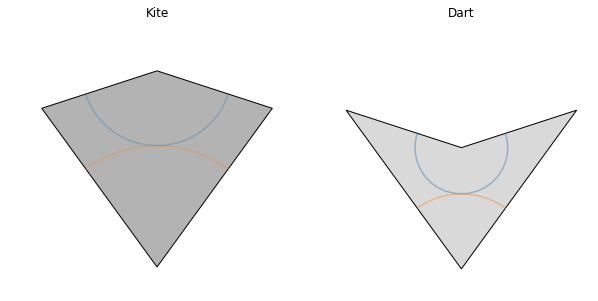

In [11]:
# This cell is identical to the one above EXCEPT for the arguments 
# passed to .draw(). 
simple_kite = Kite(orient=3)
simple_dart = Dart(orient=3)

plt.subplots(1,2,figsize=(10,5));
ax1 = plt.subplot(121)
simple_kite.draw(arcs=True,fill=True)
plt.axis('square');
ax1.axis('off');
plt.title('Kite');

ax2 = plt.subplot(122)
simple_dart.draw(arcs=True,fill=True)
plt.axis('square');
# fig.patch.set_visible(False);
ax2.axis('off');
plt.title('Dart');

## Vertex Tilings

The homework from last week was to determine all of the vertex tilings.  There are seven.  The British mathematician John Conway gave them the colorful names indicated below.

We conclude this installment on object-oriented programming by specifying the seven vertex tilings.  Specifying the orientation and position of individual tiles in each vertex tiling takes time. You have to specify, draw, check, and repeat until you're happy with the tiling. However, in the next installment of this tutorial we will talk about how to specify valid tilings that are <b>arbitrarily large</b>, we will add a few features to our tile classes, and we will deploy these classes as a module to import into other notebooks so that the code that we've written is re-usable.   

In [12]:
# In this cell we specify the vertex tilings. In the next we draw them.
ace = [Kite(orient=15, tail=e2),
       Kite(orient=11, tail=e2),
       Dart(orient=3, head=-(1/phi)*e2)]

deuce = [Kite(orient=19,tail=matrix_power(m,11)@e1),
         Kite(orient=7,tail=matrix_power(m,19)@e1),
         Dart(orient=11,head=e2),
         Dart(orient=15,head=e2)]

sun = [Kite(orient=3),
       Kite(orient=7),
       Kite(orient=11),
       Kite(orient=15),
       Kite(orient=19)]

star = [Dart(orient=3),
        Dart(orient=7),
        Dart(orient=11),
        Dart(orient=15),
        Dart(orient=19)]

jack = [Kite(orient=3,tail=matrix_power(m,15)@e1),
        Dart(orient=11,head=matrix_power(m,1)@e1),
        Dart(orient=15,head=matrix_power(m,9)@e1),
        Kite(orient=1),
        Kite(orient=5)]

queen = [Dart(orient=3),
         Kite(orient=13,tail=matrix_power(m,7)@e1),
         Kite(orient=5,tail=matrix_power(m,15)@e1),
         Kite(orient=1,tail=matrix_power(m,15)@e1),
         Kite(orient=13,tail=matrix_power(m,3)@e1)]

king = [Dart(orient=3),
        Dart(orient=7),
        Kite(orient=17,tail=-matrix_power(m,1)@e1),
        Kite(orient=9,tail=-matrix_power(m,9)@e1),
        Dart(orient=19)]

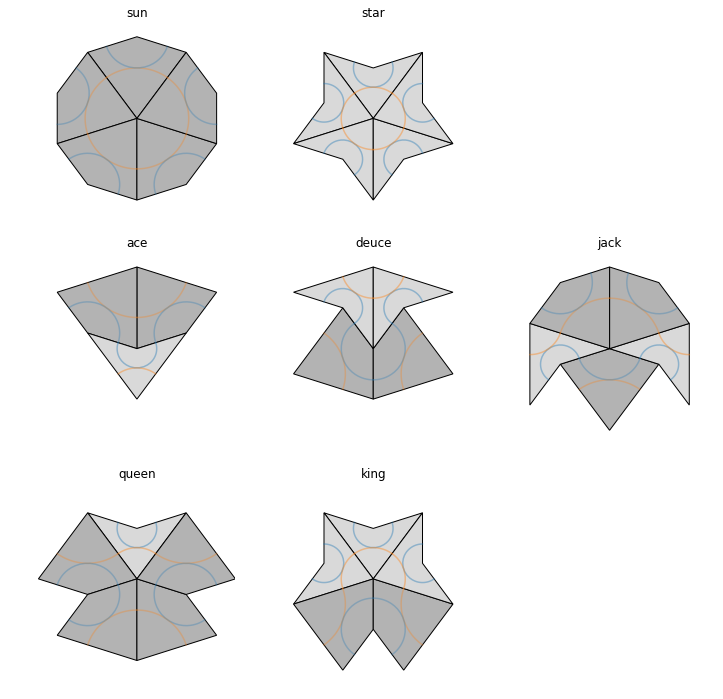

In [13]:
# There are 7 vertex tilings which we place in a 3x3 grid of subplots.
plt.subplots(3,3,figsize=(12,12))
# We place the 7 vertex tilings as defined above into a listL: a list of lists!
vertex_tilings = [sun, star, ace, deuce, jack, queen, king]
vertex_tiling_labels = ['sun', 'star', 'ace', 'deuce', 'jack', 'queen', 'king']

# We use enumerate to get the item and its index value from 0 to 6.
for i,tiling in enumerate(vertex_tilings):
    j = i+1 if i < 2 else i+2
    plt.subplot(3,3,j)
    [t.draw(arcs=True,fill=True) for t in tiling]
    plt.axis([-1.175,1.175,-1.175,1.175])
#     plt.axis('square');
    plt.axis('off');
    plt.title(vertex_tiling_labels[i])
plt.subplot(333)
plt.axis('off');
plt.subplot(339)
plt.axis('off');

If you want to print out your own set of Penrose tiles, here is the code to generate a PDF file that you can print off, cut out the Kites and Darts, and have some fun!

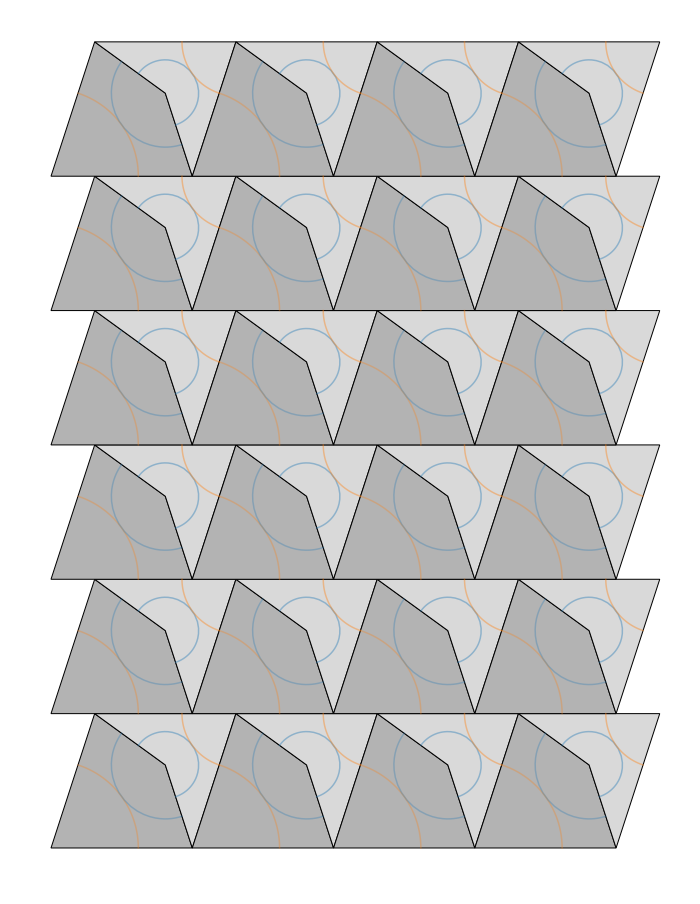

In [14]:
tiles = []
for i in range(4):
    for j in range(6):
        tiles.append(Kite().translate(i*e1 + j*np.sin(2*np.pi/5)*e2))
        tiles.append(Dart(orient=10).translate(phi*matrix_power(m,2)@e1 
                                               + i*e1 + j*np.sin(2*np.pi/5)*e2))

plt.figure(figsize=(12,16))
[t.draw(fill=True,arcs=True) for t in tiles]
plt.axis('equal');
plt.axis('off');
plt.savefig('Penrose_DIY.pdf')